In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


from simulation_funcs import (
    get_events_df_for_subject,
)

# Do probe durations vary by hit/miss?

I'm trying to understand why there is a mild bias in the feedback hit vs. miss contrast when signal is only introduced during the fixation.  If it is the case that the probe durations vary, this could explain why.  The further the Feedback onset is from the introduced fixation activation, the weaker the bias would be.

In [2]:
sub = 1
events = get_events_df_for_subject(sub, dataset='ABCD')

In [3]:
events

events['FEEDBACK_PROBE_DIFF'] = (
    events['FEEDBACK_ONSET'] - events['PROBE_ONSET']
)
average_diff = events.groupby(['TRIAL_TYPE', 'PROBE_HIT'])[
    'FEEDBACK_PROBE_DIFF'
].mean()
average_diff = average_diff.reset_index(name='FEEDBACK_PROBE_DIFF')
print(average_diff)

     TRIAL_TYPE  PROBE_HIT  FEEDBACK_PROBE_DIFF
0     LargeGain        0.0             0.297750
1     LargeGain        1.0             0.322250
2     LargeLoss        0.0             0.290000
3     LargeLoss        1.0             0.318733
4  NoMoneyStake        0.0             0.296231
5  NoMoneyStake        1.0             0.328429
6     SmallGain        0.0             0.290571
7     SmallGain        1.0             0.330923
8     SmallLoss        0.0             0.289455
9     SmallLoss        1.0             0.329667


In [4]:
def get_feedback_probe_diff(sub):
    events = get_events_df_for_subject(sub, dataset='ABCD')
    events['FEEDBACK_PROBE_DIFF'] = (
        events['FEEDBACK_ONSET'] - events['PROBE_ONSET']
    )
    average_diff = events.groupby(['TRIAL_TYPE', 'PROBE_HIT'])[
        'FEEDBACK_PROBE_DIFF'
    ].mean()
    average_diff = average_diff.reset_index(name='FEEDBACK_PROBE_DIFF')
    return average_diff

In [5]:
get_feedback_probe_diff(1)

,TRIAL_TYPE,PROBE_HIT,FEEDBACK_PROBE_DIFF
0,LargeGain,0.0,0.297750
1,LargeGain,1.0,0.322250
2,LargeLoss,0.0,0.290000
3,LargeLoss,1.0,0.318733
4,NoMoneyStake,0.0,0.296231
5,NoMoneyStake,1.0,0.328429
6,SmallGain,0.0,0.290571
7,SmallGain,1.0,0.330923
8,SmallLoss,0.0,0.289455
9,SmallLoss,1.0,0.329667


In [6]:
# get_subdata_long(sub, dataset="AHRB", verbose=False)

all_dfs = []
for sub in range(1, 501):
    df = get_feedback_probe_diff(sub)
    all_dfs.append(df)
concatenated_df = pd.concat(all_dfs, ignore_index=True)

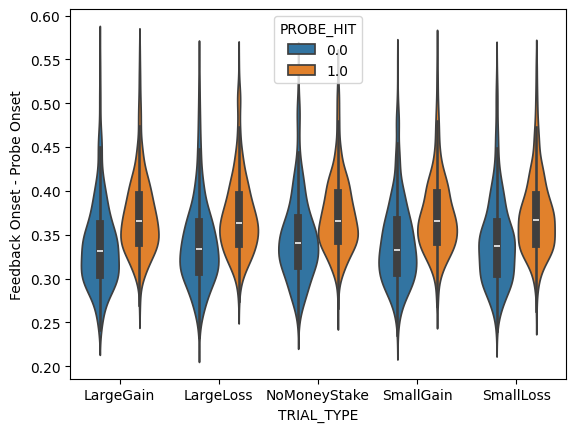

In [7]:
sns.violinplot(
    x='TRIAL_TYPE',
    y='FEEDBACK_PROBE_DIFF',
    hue='PROBE_HIT',
    data=concatenated_df,
)
plt.ylabel('Feedback Onset - Probe Onset')
plt.show()

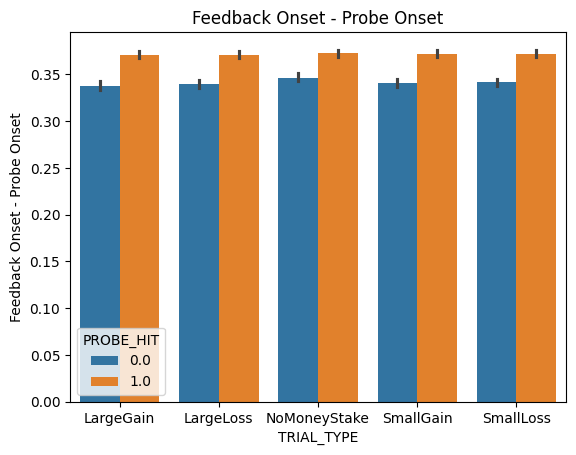

In [8]:
sns.barplot(
    x='TRIAL_TYPE',
    y='FEEDBACK_PROBE_DIFF',
    hue='PROBE_HIT',
    data=concatenated_df,
)
plt.title('Feedback Onset - Probe Onset')
plt.ylabel('Feedback Onset - Probe Onset')
plt.show()

In [9]:
def get_fixation_probe_diff(sub):
    events = get_events_df_for_subject(sub, dataset='ABCD')
    events['FIXATION_PROBE_DIFF'] = (
        events['PROBE_ONSET'] - events['FIXATION_ONSET']
    )
    average_diff = events.groupby(['TRIAL_TYPE', 'PROBE_HIT'])[
        'FIXATION_PROBE_DIFF'
    ].mean()
    average_diff = average_diff.reset_index(name='FIXATION_PROBE_DIFF')
    return average_diff

In [10]:
all_dfs_fixation = []
for sub in range(1, 501):
    df = get_fixation_probe_diff(sub)
    all_dfs_fixation.append(df)
concatenated_df_fixation = pd.concat(all_dfs_fixation, ignore_index=True)

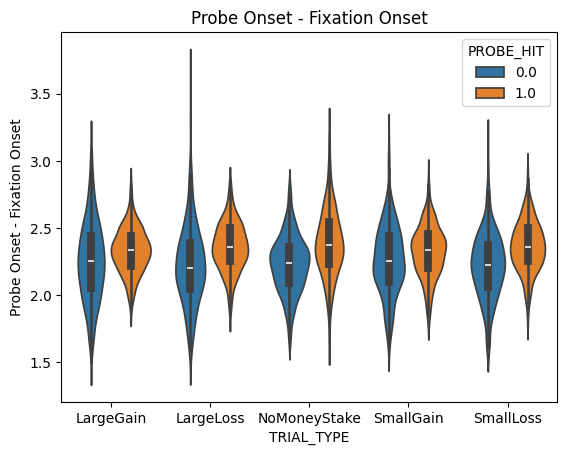

In [11]:
sns.violinplot(
    x='TRIAL_TYPE',
    y='FIXATION_PROBE_DIFF',
    hue='PROBE_HIT',
    data=concatenated_df_fixation,
)
plt.ylabel('Probe Onset - Fixation Onset')
plt.title('Probe Onset - Fixation Onset')
plt.show()

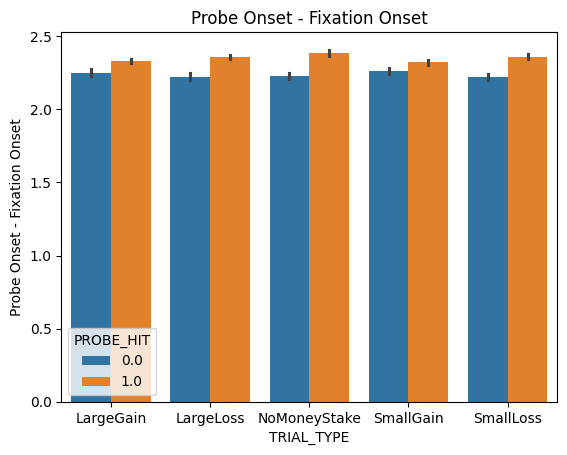

In [12]:
sns.barplot(
    x='TRIAL_TYPE',
    y='FIXATION_PROBE_DIFF',
    hue='PROBE_HIT',
    data=concatenated_df_fixation,
)
plt.title('Probe Onset - Fixation Onset')
plt.ylabel('Probe Onset - Fixation Onset')
plt.show()

In [13]:
def get_fixation_feedback_diff(sub):
    events = get_events_df_for_subject(sub, dataset='ABCD')
    events['FIXATION_FEEDBACK_DIFF'] = (
        events['FEEDBACK_ONSET'] - events['FIXATION_ONSET']
    )
    average_diff = events.groupby(['TRIAL_TYPE', 'PROBE_HIT'])[
        'FIXATION_FEEDBACK_DIFF'
    ].mean()
    average_diff = average_diff.reset_index(name='FIXATION_FEEDBACK_DIFF')
    return average_diff

In [14]:
all_dfs_fixation_fb = []
for sub in range(1, 501):
    df = get_fixation_feedback_diff(sub)
    all_dfs_fixation_fb.append(df)
concatenated_df_fixation_fb = pd.concat(all_dfs_fixation_fb, ignore_index=True)

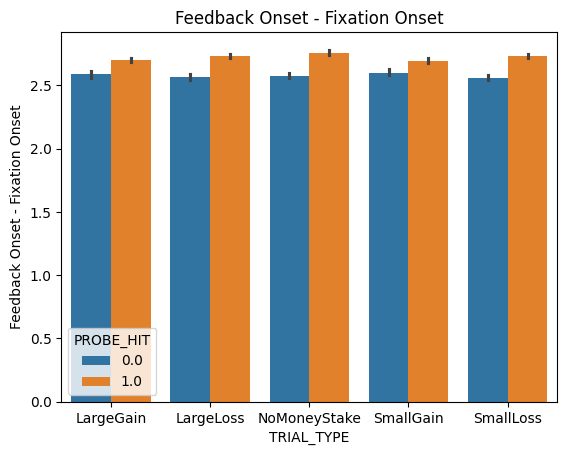

In [15]:
sns.barplot(
    x='TRIAL_TYPE',
    y='FIXATION_FEEDBACK_DIFF',
    hue='PROBE_HIT',
    data=concatenated_df_fixation_fb,
)
plt.title('Feedback Onset - Fixation Onset')
plt.ylabel('Feedback Onset - Fixation Onset')
plt.show()

In [16]:
def get_all_durations(sub):
    events = get_events_df_for_subject(sub, dataset='ABCD')
    events['TD1_ONSET'] = events['PROBE_ONSET'] + events['PROBE_DURATION']
    events['TD1_DURATION'] = events['FEEDBACK_ONSET'] - events['TD1_ONSET']
    events = events.rename(
        columns={
            'FIXATION_DURATION': 'Fixation_DURATION',
            'PROBE_DURATION': 'Probe_DURATION',
        }
    )
    average_dur = events.groupby(['TRIAL_TYPE', 'PROBE_HIT'])[
        ['Fixation_DURATION', 'Probe_DURATION', 'TD1_DURATION']
    ].mean()
    average_dur = average_dur.reset_index()
    return average_dur

In [17]:

all_dfs_duration = []
for sub in range(1, 501):
    df = get_all_durations(sub)
    all_dfs_duration.append(df)
concatenated_df_duration = pd.concat(all_dfs_duration, ignore_index=True)

In [18]:
print(concatenated_df_duration.columns)

Index(['TRIAL_TYPE', 'PROBE_HIT', 'Fixation_DURATION', 'Probe_DURATION',
       'TD1_DURATION'],
      dtype='object')


In [19]:
print(concatenated_df_duration.shape)
concatenated_df_duration_long = pd.melt(
    concatenated_df_duration,
    id_vars=['TRIAL_TYPE', 'PROBE_HIT'],
    value_vars=[
        col for col in concatenated_df_duration.columns if 'DURATION' in col
    ],
    var_name='Stimulus',
    value_name='DURATION',
)
concatenated_df_duration_long['Stimulus'] = concatenated_df_duration_long[
    'Stimulus'
].str.replace('_DURATION', '')
concatenated_df_duration_long[
    'stimulus_outcome'
] = concatenated_df_duration_long.apply(
    lambda row: f"{row['Stimulus']}/Hit"
    if row['PROBE_HIT'] == 1
    else f"{row['Stimulus']}/Miss",
    axis=1,
)
print(concatenated_df_duration_long)

(5000, 5)
         TRIAL_TYPE  PROBE_HIT  Stimulus  DURATION stimulus_outcome
0         LargeGain        0.0  Fixation  2.499750    Fixation/Miss
1         LargeGain        1.0  Fixation  2.166583     Fixation/Hit
2         LargeLoss        0.0  Fixation  2.899800    Fixation/Miss
3         LargeLoss        1.0  Fixation  2.099867     Fixation/Hit
4      NoMoneyStake        0.0  Fixation  2.538154    Fixation/Miss
...             ...        ...       ...       ...              ...
14995  NoMoneyStake        1.0       TD1  0.066636          TD1/Hit
14996     SmallGain        0.0       TD1  0.063455         TD1/Miss
14997     SmallGain        1.0       TD1  0.063000          TD1/Hit
14998     SmallLoss        0.0       TD1  0.066833         TD1/Miss
14999     SmallLoss        1.0       TD1  0.066857          TD1/Hit

[15000 rows x 5 columns]


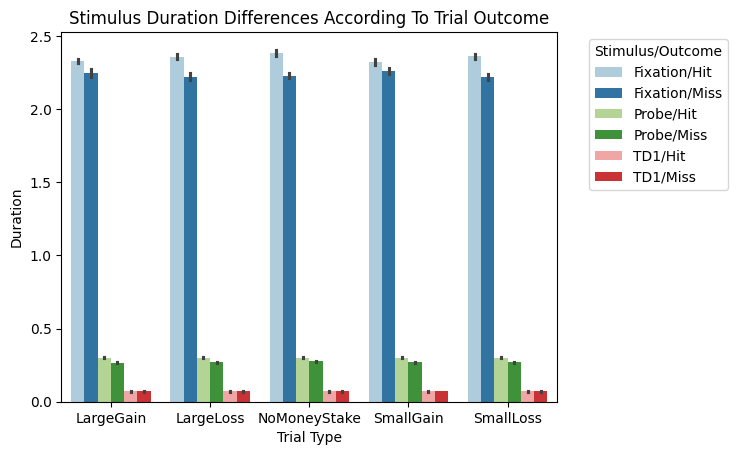

In [20]:
sns.barplot(
    x='TRIAL_TYPE',
    y='DURATION',
    hue='stimulus_outcome',
    data=concatenated_df_duration_long,
    palette='Paired',
    hue_order=[
        'Fixation/Hit',
        'Fixation/Miss',
        'Probe/Hit',
        'Probe/Miss',
        'TD1/Hit',
        'TD1/Miss',
    ],
)
plt.legend(
    title='Stimulus/Outcome', bbox_to_anchor=(1.05, 1), loc='upper left'
)
plt.ylabel('Duration')
plt.xlabel('Trial Type')
plt.title('Stimulus Duration Differences According To Trial Outcome')
plt.show()

In [21]:
events

,index,trial_number,TRIAL_TYPE,CUE_ONSET,CUE_DURATION,FIXATION_ONSET,FIXATION_DURATION,PROBE_ONSET,PROBE_DURATION,FEEDBACK_ONSET,FEEDBACK_DURATION,RT_corrected,PROBE_HIT,FEEDBACK_PROBE_DIFF
0,0,0,SmallGain,2.034,1.966,4.000,4.000,8.000,0.233,8.300,1.733,330.0,0.0,0.300
1,1,1,SmallLoss,10.033,1.967,12.000,3.499,15.499,0.234,15.799,1.734,214.0,1.0,0.300
2,2,2,NoMoneyStake,17.533,1.966,19.499,2.500,21.999,0.233,22.299,1.733,219.0,1.0,0.300
3,3,3,SmallGain,24.032,1.967,25.999,2.000,27.999,0.233,28.299,1.733,191.0,1.0,0.300
4,4,4,SmallLoss,30.032,1.966,31.998,4.000,35.998,0.217,36.281,1.750,67.0,0.0,0.283
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,45,95,LargeLoss,603.515,1.966,605.481,1.500,606.981,0.217,607.264,1.750,197.0,1.0,0.283
96,46,96,LargeGain,609.014,1.967,610.981,1.500,612.481,0.200,612.747,1.767,222.0,0.0,0.266
97,47,97,SmallGain,614.514,1.966,616.480,1.500,617.980,0.200,618.247,1.766,218.0,0.0,0.267
98,48,98,SmallLoss,620.013,1.967,621.980,2.000,623.980,0.200,624.247,1.766,NaN,0.0,0.267


In [22]:
def get_all_rts(sub):
    events = get_events_df_for_subject(sub, dataset='ABCD')
    events = events.rename(columns={'RT_corrected': 'Response Time'})
    average_rt = events.groupby(['TRIAL_TYPE', 'PROBE_HIT'])[
        ['Response Time']
    ].mean()
    average_rt = average_rt.reset_index()
    return average_rt

In [23]:
all_dfs_rts = []
for sub in range(1, 501):
    df = get_all_rts(sub)
    all_dfs_rts.append(df)
concatenated_df_rts = pd.concat(all_dfs_rts, ignore_index=True)

In [24]:
concatenated_df_rts['stimulus_outcome'] = concatenated_df_duration_long.apply(
    lambda row: f'Hit' if row['PROBE_HIT'] == 1 else f'Miss', axis=1
)
print(concatenated_df_rts)

        TRIAL_TYPE  PROBE_HIT  Response Time stimulus_outcome
0        LargeGain        0.0     241.500000             Miss
1        LargeGain        1.0     213.333333              Hit
2        LargeLoss        0.0     230.500000             Miss
3        LargeLoss        1.0     216.600000              Hit
4     NoMoneyStake        0.0     261.400000             Miss
...            ...        ...            ...              ...
4995  NoMoneyStake        1.0     219.454545              Hit
4996     SmallGain        0.0     281.000000             Miss
4997     SmallGain        1.0     226.666667              Hit
4998     SmallLoss        0.0     227.500000             Miss
4999     SmallLoss        1.0     211.857143              Hit

[5000 rows x 4 columns]


In [25]:
events

,index,trial_number,TRIAL_TYPE,CUE_ONSET,CUE_DURATION,FIXATION_ONSET,FIXATION_DURATION,PROBE_ONSET,PROBE_DURATION,FEEDBACK_ONSET,FEEDBACK_DURATION,RT_corrected,PROBE_HIT,FEEDBACK_PROBE_DIFF
0,0,0,SmallGain,2.034,1.966,4.000,4.000,8.000,0.233,8.300,1.733,330.0,0.0,0.300
1,1,1,SmallLoss,10.033,1.967,12.000,3.499,15.499,0.234,15.799,1.734,214.0,1.0,0.300
2,2,2,NoMoneyStake,17.533,1.966,19.499,2.500,21.999,0.233,22.299,1.733,219.0,1.0,0.300
3,3,3,SmallGain,24.032,1.967,25.999,2.000,27.999,0.233,28.299,1.733,191.0,1.0,0.300
4,4,4,SmallLoss,30.032,1.966,31.998,4.000,35.998,0.217,36.281,1.750,67.0,0.0,0.283
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,45,95,LargeLoss,603.515,1.966,605.481,1.500,606.981,0.217,607.264,1.750,197.0,1.0,0.283
96,46,96,LargeGain,609.014,1.967,610.981,1.500,612.481,0.200,612.747,1.767,222.0,0.0,0.266
97,47,97,SmallGain,614.514,1.966,616.480,1.500,617.980,0.200,618.247,1.766,218.0,0.0,0.267
98,48,98,SmallLoss,620.013,1.967,621.980,2.000,623.980,0.200,624.247,1.766,NaN,0.0,0.267


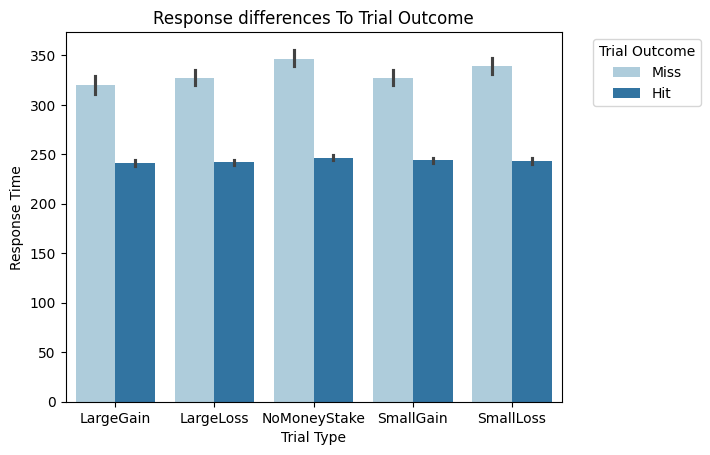

In [26]:
sns.barplot(
    x='TRIAL_TYPE',
    y='Response Time',
    hue='stimulus_outcome',
    data=concatenated_df_rts,
    palette='Paired',
)
plt.legend(title='Trial Outcome', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.ylabel('Response Time')
plt.xlabel('Trial Type')
plt.title('Response differences To Trial Outcome')
plt.show()

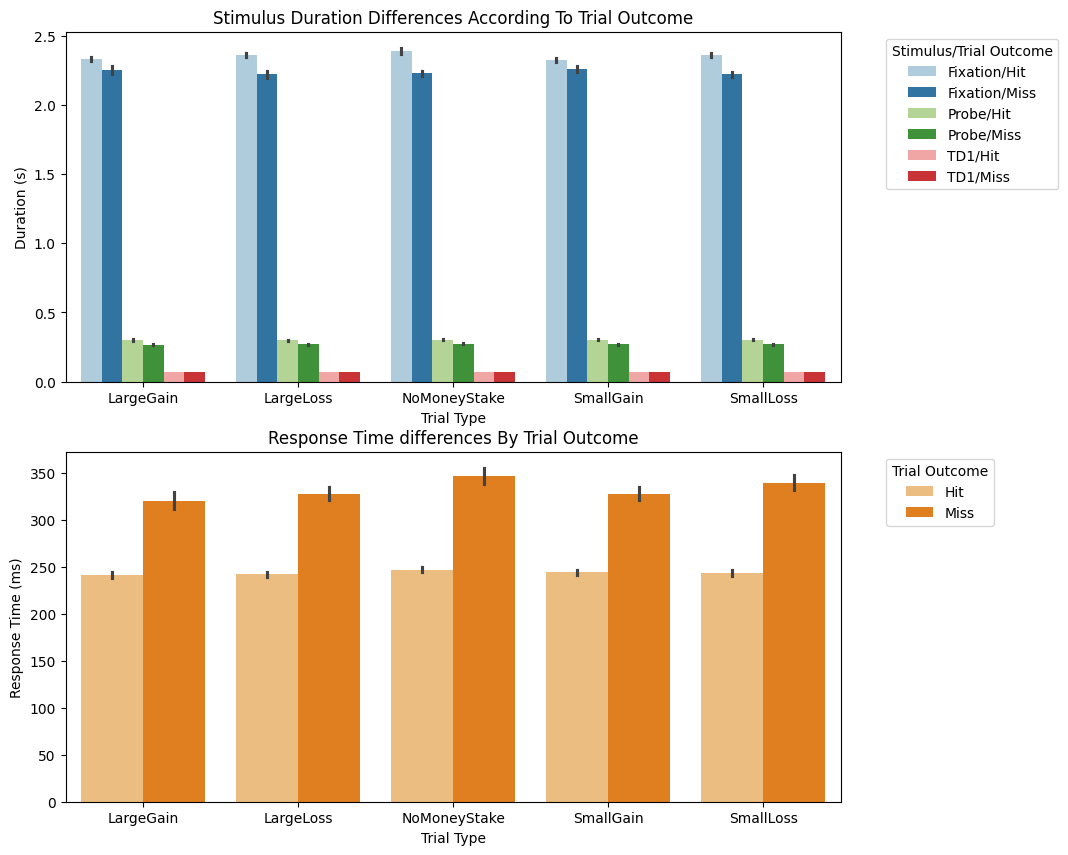

In [27]:
# Put the above two plots together

fig, axs = plt.subplots(2, 1, figsize=(10, 10))


sns.barplot(
    x='TRIAL_TYPE',
    y='DURATION',
    hue='stimulus_outcome',
    data=concatenated_df_duration_long,
    palette='Paired',
    hue_order=[
        'Fixation/Hit',
        'Fixation/Miss',
        'Probe/Hit',
        'Probe/Miss',
        'TD1/Hit',
        'TD1/Miss',
    ],
    ax=axs[0],
)

axs[0].legend(
    title='Stimulus/Trial Outcome', bbox_to_anchor=(1.05, 1), loc='upper left'
)
axs[0].set_ylabel('Duration (s)')
axs[0].set_xlabel('Trial Type')
axs[0].set_title('Stimulus Duration Differences According To Trial Outcome')

sns.barplot(
    x='TRIAL_TYPE',
    y='Response Time',
    hue='stimulus_outcome',
    data=concatenated_df_rts,
    palette=sns.color_palette('Paired')[6:8],
    ax=axs[1],
    hue_order=['Hit', 'Miss'],
)
axs[1].legend(
    title='Trial Outcome', bbox_to_anchor=(1.05, 1), loc='upper left'
)
axs[1].set_ylabel('Response Time (ms)')
axs[1].set_xlabel('Trial Type')
axs[1].set_title('Response Time differences By Trial Outcome')


plt.show()